<a href="https://colab.research.google.com/github/HarisMashood/Homework5_Eye_Tracking/blob/main/Homework_5_Eye_Tracking_(For_GitHub_Repo)1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import necessary libraries
import pandas as pd

# Clone the GitHub repository (only needs to be done once per session)
!git clone https://github.com/HarisMashood/Homework5_Eye_Tracking.git

# File paths for GitHub repo
repo_path = '/content/Homework5_Eye_Tracking'
file_path = f'{repo_path}/yarbus_complete_data.csv'
image_path = f'{repo_path}/unexpected_visitor.png'
preprocessed_file_path = f'{repo_path}/yarbus_preprocessed_data.csv'

# Load the CSV file
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print("Initial Data Preview:")
print(data.head())

# Define screen boundaries (assuming standard resolution for now)
SCREEN_WIDTH = 1990
SCREEN_HEIGHT = 1200

# Filter out invalid gaze points and points outside the screen boundaries
filtered_data = data[
    (data['validity'] == 'Valid') &
    (data['x'] >= 0) & (data['x'] <= SCREEN_WIDTH) &
    (data['y'] >= 0) & (data['y'] <= SCREEN_HEIGHT)
]

# Normalize timestamps to seconds from the start of the recording
filtered_data['timestamp_seconds'] = (
    filtered_data['timestamp_us'] - filtered_data['timestamp_us'].min()
) / 1_000_000

# Map task codes to full task descriptions
task_descriptions = {
    "free_viewing": "Look at the image freely.",
    "estimate_wealth": "Estimate the material circumstances of the family.",
    "age_estimation": "Estimate the ages of the people in the image.",
    "activity": "What were the people doing before the unexpected visitor arrived?",
    "remember_clothes": "Remember the clothes worn by the people in the image.",
    "furniture": "Remember the positions of the objects and people in the room.",
}
filtered_data['task_description'] = filtered_data['task'].map(task_descriptions)

# Display a preview of the filtered data
print("\nFiltered Data Preview:")
print(filtered_data.head())

# Save the preprocessed data back to the GitHub repo folder
filtered_data.to_csv(preprocessed_file_path, index=False)

print(f"\nPreprocessed data saved at: {preprocessed_file_path}")

fatal: destination path 'Homework5_Eye_Tracking' already exists and is not an empty directory.
Initial Data Preview:
             x           y validity   timestamp_us          task
0  1407.382080  479.778687    Valid  1863999707017  free_viewing
1  1407.162842  480.453064    Valid  1863999737161  free_viewing
2  1406.528931  480.837677    Valid  1863999767419  free_viewing
3  1406.229370  481.434814    Valid  1863999797563  free_viewing
4  1402.487183  481.662781    Valid  1863999827803  free_viewing

Filtered Data Preview:
             x           y validity   timestamp_us          task  \
0  1407.382080  479.778687    Valid  1863999707017  free_viewing   
1  1407.162842  480.453064    Valid  1863999737161  free_viewing   
2  1406.528931  480.837677    Valid  1863999767419  free_viewing   
3  1406.229370  481.434814    Valid  1863999797563  free_viewing   
4  1402.487183  481.662781    Valid  1863999827803  free_viewing   

   timestamp_seconds           task_description  
0         

<ipython-input-14-93fe0096ec5a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['timestamp_seconds'] = (
<ipython-input-14-93fe0096ec5a>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['task_description'] = filtered_data['task'].map(task_descriptions)


<ipython-input-17-6ef53ac17505>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['y_flipped'] = image.shape[0] - task_data['y']
<ipython-input-17-6ef53ac17505>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['y_flipped'] = image.shape[0] - task_data['y']
<ipython-input-17-6ef53ac17505>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

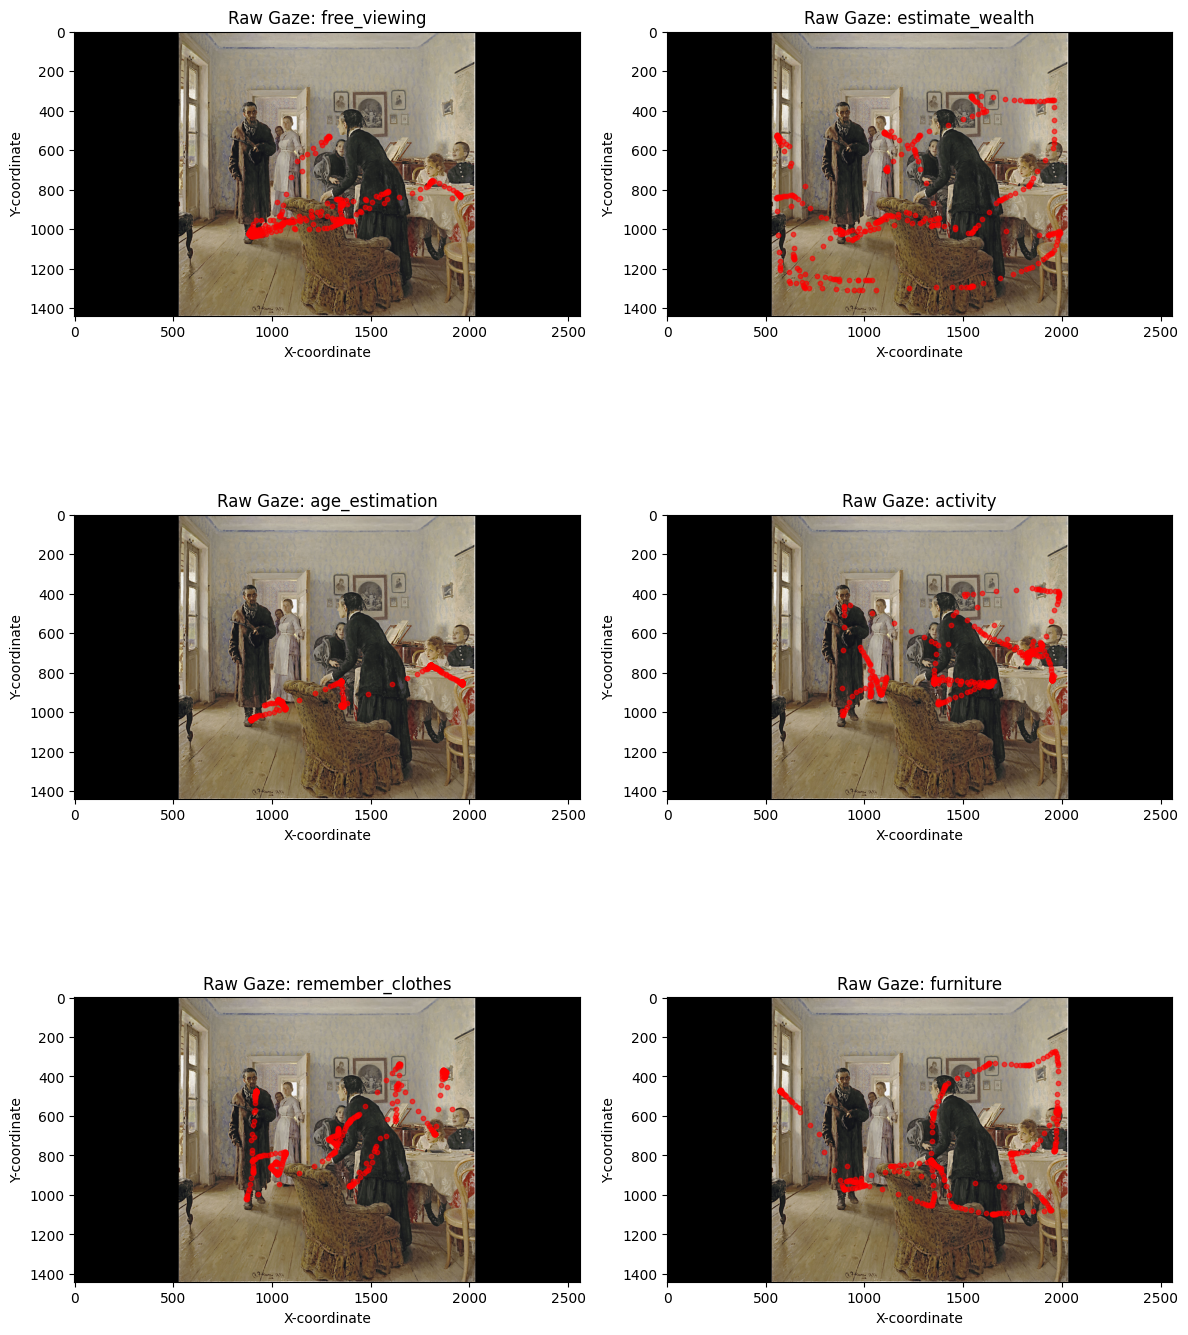

In [17]:
# Define the path to the image in the GitHub repository
image_path = '/content/Homework5_Eye_Tracking/unexpected_visitor.png'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image from BGR to RGB for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get unique tasks
tasks = filtered_data['task'].unique()

# Calculate number of rows needed for 2-column layout
num_tasks = len(tasks)
num_rows = (num_tasks + 1) // 2  # Round up for odd numbers

# Create subplots for 2-column visualization
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate raw gaze point plots for each task
for ax, task in zip(axes, tasks):
    task_data = filtered_data[filtered_data['task'] == task]
    task_data['y_flipped'] = image.shape[0] - task_data['y']

    # Plot raw gaze data points on the image
    ax.imshow(image)
    ax.scatter(
        task_data['x'],
        task_data['y_flipped'],
        s=10,
        c='red',
        alpha=0.6
    )
    ax.set_title(f'Raw Gaze: {task}')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')

# Hide any unused axes if the number of tasks is odd
for ax in axes[num_tasks:]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-43-691dd58b5db1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['y_flipped'] = image.shape[0] - task_data['y']


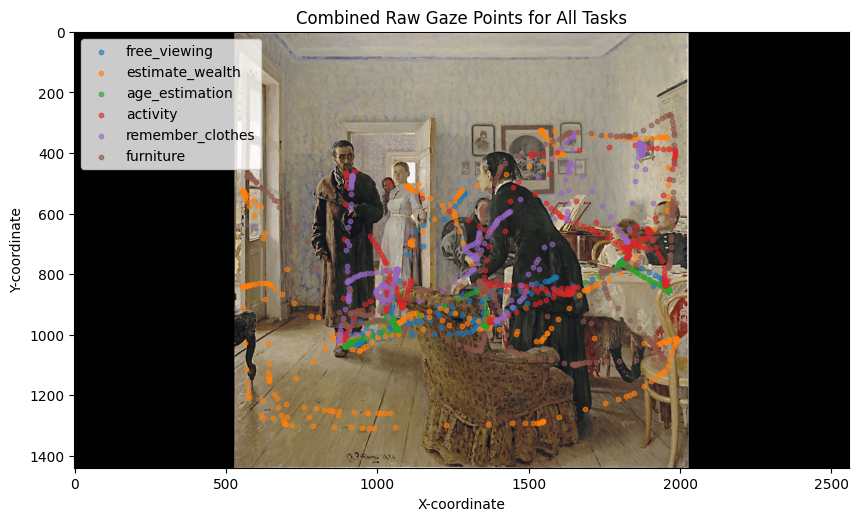

In [43]:
# Combined raw gaze plot
plt.figure(figsize=(10, 8))
plt.imshow(image)

# Plot all tasks together
for task in tasks:
    task_data = filtered_data[filtered_data['task'] == task]
    task_data['y_flipped'] = image.shape[0] - task_data['y']
    plt.scatter(
        task_data['x'],
        task_data['y_flipped'],
        s=10,
        alpha=0.6,
        label=task
    )

plt.title('Combined Raw Gaze Points for All Tasks')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()

<ipython-input-18-3283b94d9c68>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['y_flipped'] = image.shape[0] - task_data['y']
<ipython-input-18-3283b94d9c68>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['y_flipped'] = image.shape[0] - task_data['y']
<ipython-input-18-3283b94d9c68>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

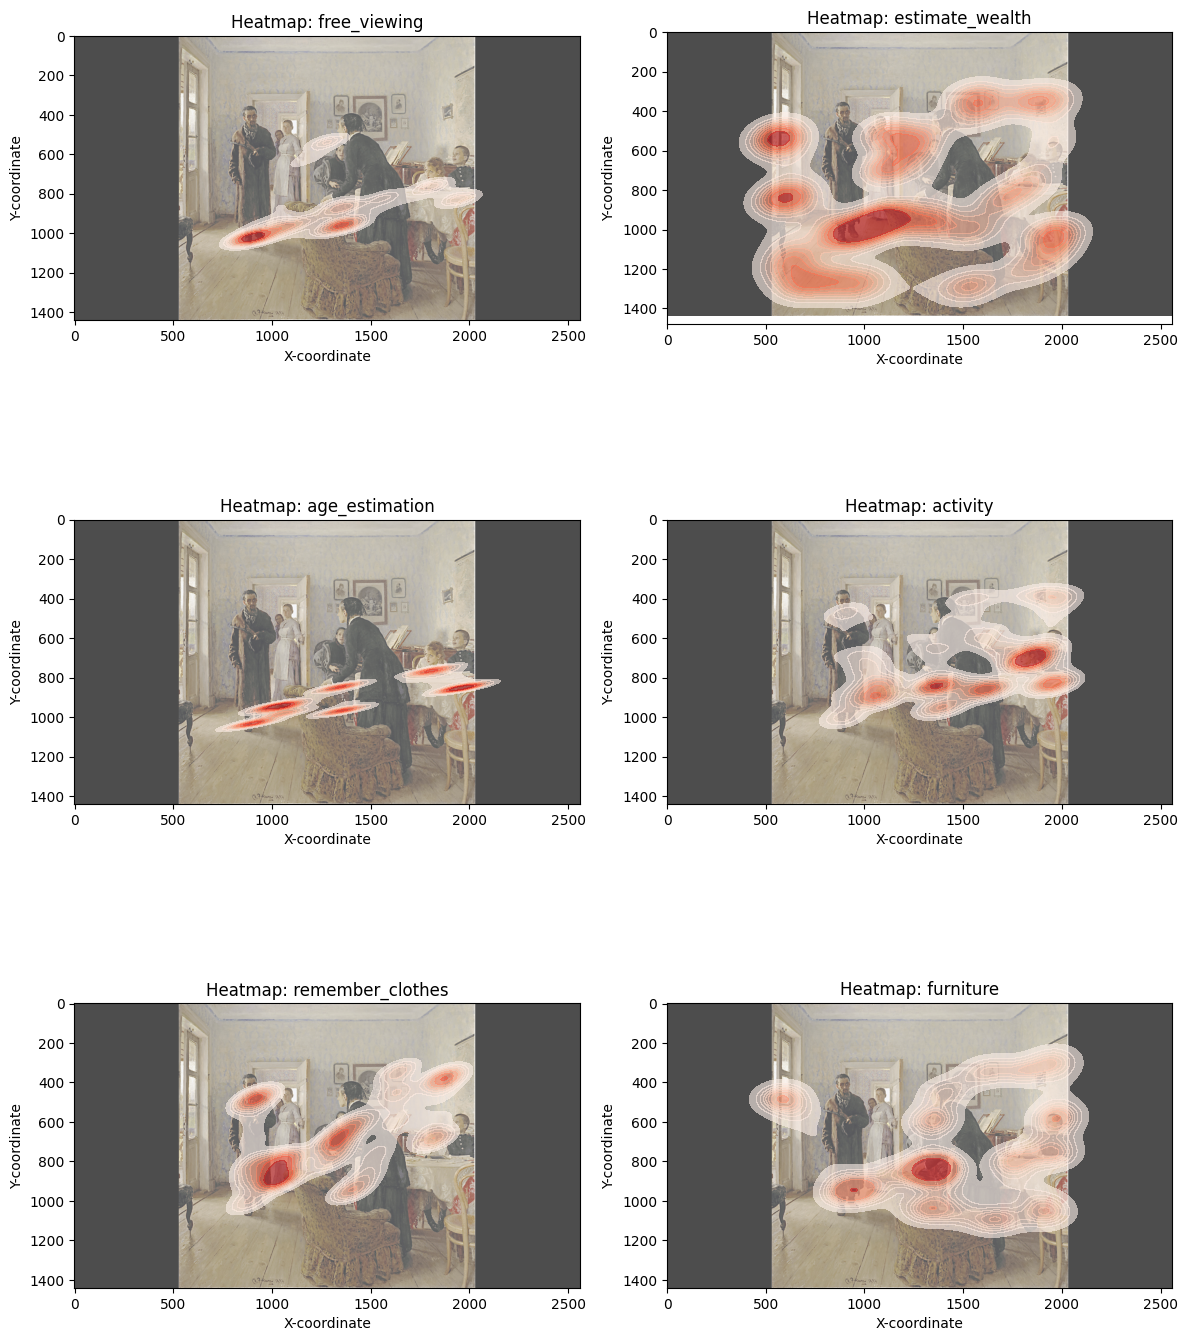

In [18]:
# Generate heatmaps for each task in a 2-column layout
num_tasks = len(tasks)
num_rows = (num_tasks + 1) // 2  # Round up for odd numbers

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for ax, task in zip(axes, tasks):
    task_data = filtered_data[filtered_data['task'] == task]
    task_data['y_flipped'] = image.shape[0] - task_data['y']

    # Create a heatmap of gaze points
    ax.imshow(image, alpha=0.7)  # Add the image as the background
    sns.kdeplot(
        x=task_data['x'],
        y=task_data['y_flipped'],
        cmap='Reds',
        fill=True,
        alpha=0.6,
        bw_adjust=0.5,
        ax=ax
    )
    ax.set_title(f'Heatmap: {task}')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')

# Hide any unused axes if the number of tasks is odd
for ax in axes[num_tasks:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [37]:
def ivt_algorithm(data, velocity_threshold=40):
    """
    Implements the I-VT algorithm for eye movement classification.

    Args:
    - data: DataFrame containing gaze data.
    - velocity_threshold: Threshold to classify fixations and saccades.

    Returns:
    - fixations: List of (start, end) indices for fixations.
    - saccades: List of (start, end) indices for saccades.
    - velocities: List of computed velocities.
    """
    import numpy as np

    # Step 1: Calculate velocities
    velocities = []
    classifications = []  # Store classification for each point
    for i in range(1, len(data)):
        dx = data['x'].iloc[i] - data['x'].iloc[i - 1]
        dy = data['y'].iloc[i] - data['y'].iloc[i - 1]
        dt = data['timestamp_seconds'].iloc[i] - data['timestamp_seconds'].iloc[i - 1]
        if dt > 0:
            velocity = np.sqrt(dx**2 + dy**2) / dt
        else:
            velocity = 0
        velocities.append(velocity)

        # Classify based on threshold
        if velocity < velocity_threshold:
            classifications.append('Fixation')
        else:
            classifications.append('Saccade')

    # Step 2: Identify fixations and saccades
    fixations = []
    saccades = []
    current_start = 0
    current_type = classifications[0]

    for i, classification in enumerate(classifications + ['END']):  # Add END marker for processing last segment
        if classification != current_type or classification == 'END':
            if current_type == 'Fixation':
                fixations.append((current_start, i))
            else:
                saccades.append((current_start, i))
            current_start = i
            current_type = classification

    return fixations, saccades, velocities

<ipython-input-38-2647dc49e8eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['y_flipped'] = image.shape[0] - task_data['y']


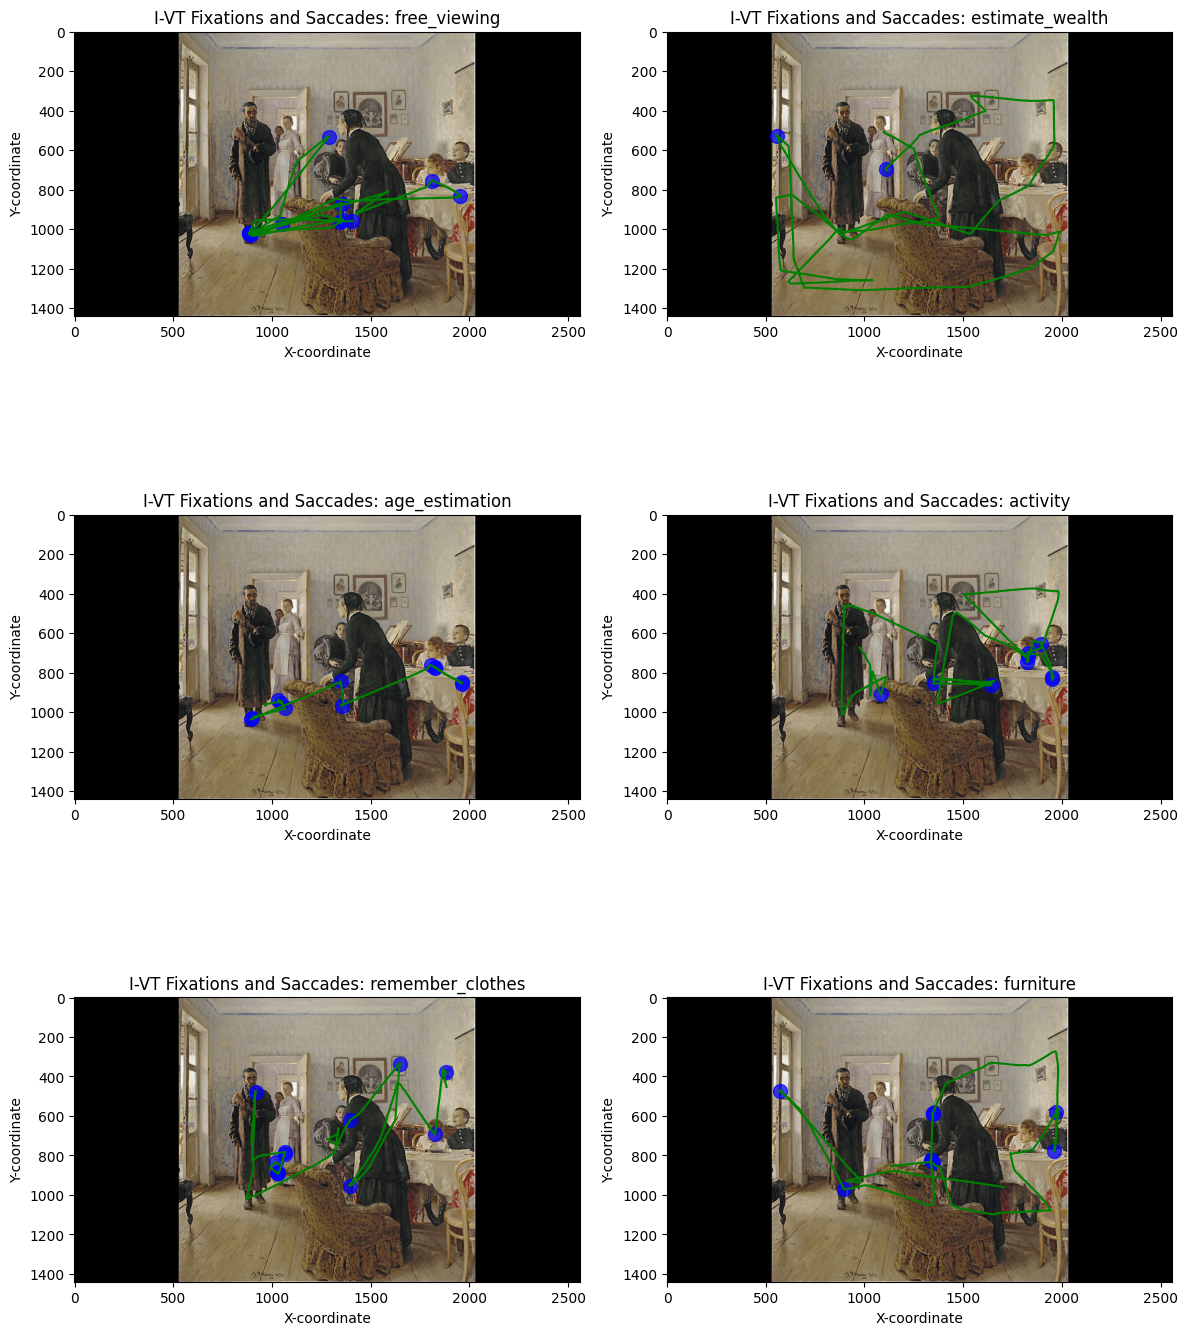

In [38]:
# Visualize fixations and saccades for each task in a 2-column layout
num_rows = (len(tasks) + 1) // 2  # Round up for odd numbers

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for ax, task in zip(axes, tasks):
    task_data = filtered_data[filtered_data['task'] == task]
    task_data['y_flipped'] = image.shape[0] - task_data['y']

    # Run the I-VT algorithm for the task
    fixations, saccades, velocities = ivt_algorithm(task_data)

    ax.imshow(image)

    # Plot fixation centroids
    for fixation in fixations:
        fixation_points = task_data.iloc[fixation[0]:fixation[1]]
        center_x = fixation_points['x'].mean()
        center_y = fixation_points['y_flipped'].mean()
        ax.scatter(center_x, center_y, c='blue', s=100, alpha=0.7, label='Fixation' if 'Fixation' not in ax.get_legend_handles_labels()[1] else "")

    # Plot saccades
    for saccade in saccades:
        saccade_points = task_data.iloc[saccade[0]:saccade[1]]
        ax.plot(saccade_points['x'], saccade_points['y_flipped'], c='green', linewidth=1.5, label='Saccade' if 'Saccade' not in ax.get_legend_handles_labels()[1] else "")

    ax.set_title(f'I-VT Fixations and Saccades: {task}')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')

# Hide unused axes
for ax in axes[len(tasks):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

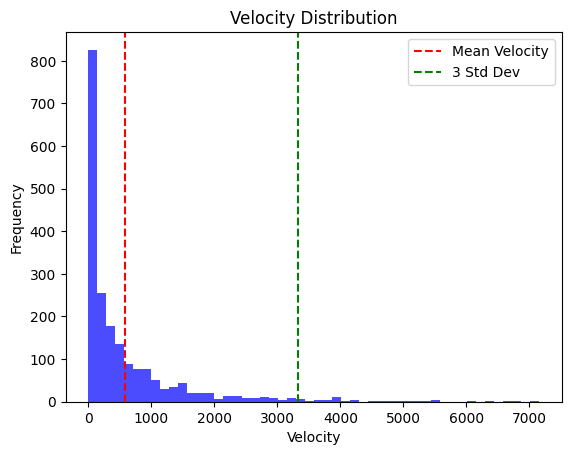

In [39]:
# Plot velocity distribution to adjust thresholds
_, _, _, velocities = smi_velocity_algorithm(filtered_data)

plt.hist(velocities, bins=50, color='blue', alpha=0.7)
plt.title("Velocity Distribution")
plt.xlabel("Velocity")
plt.ylabel("Frequency")
plt.axvline(x=np.mean(velocities), color='red', linestyle='--', label='Mean Velocity')
plt.axvline(x=np.mean(velocities) + 3 * np.std(velocities), color='green', linestyle='--', label='3 Std Dev')
plt.legend()
plt.show()

<ipython-input-42-f5d9c585b9b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['y_flipped'] = image.shape[0] - task_data['y']



Fixation Duration Stats for Task: free_viewing
Mean: 0.18 seconds
Median: 0.09 seconds
Max: 0.66 seconds
Min: 0.00 seconds

Fixation Duration Stats for Task: estimate_wealth
Mean: 0.17 seconds
Median: 0.17 seconds
Max: 0.21 seconds
Min: 0.12 seconds

Fixation Duration Stats for Task: age_estimation
Mean: 0.47 seconds
Median: 0.63 seconds
Max: 0.88 seconds
Min: 0.00 seconds

Fixation Duration Stats for Task: activity
Mean: 0.14 seconds
Median: 0.09 seconds
Max: 0.51 seconds
Min: 0.00 seconds

Fixation Duration Stats for Task: remember_clothes
Mean: 0.14 seconds
Median: 0.06 seconds
Max: 0.60 seconds
Min: 0.00 seconds

Fixation Duration Stats for Task: furniture
Mean: 0.14 seconds
Median: 0.06 seconds
Max: 0.97 seconds
Min: 0.00 seconds


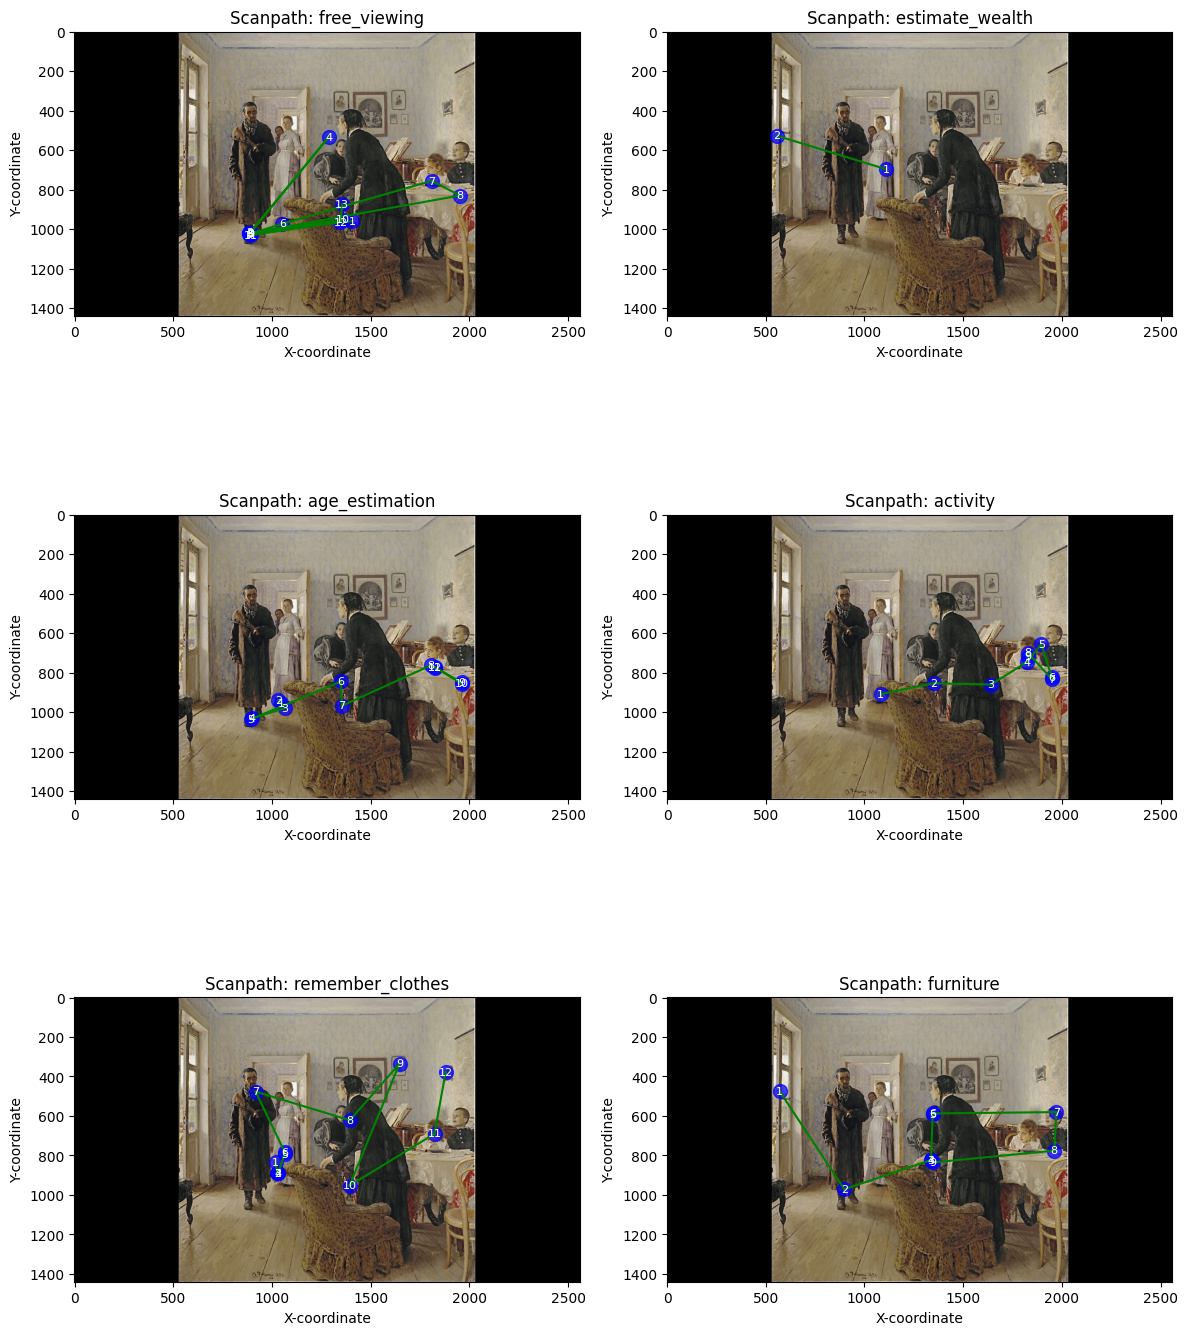

In [42]:
# Analyze fixation durations and visualize scanpaths for each task using I-VT algorithm
num_rows = (len(tasks) + 1) // 2  # Round up for odd numbers

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for ax, task in zip(axes, tasks):
    task_data = filtered_data[filtered_data['task'] == task]
    task_data['y_flipped'] = image.shape[0] - task_data['y']

    # Run the I-VT algorithm
    fixations, _, _ = ivt_algorithm(task_data)

    # Compute fixation durations
    fixation_durations = [
        task_data['timestamp_seconds'].iloc[fixation[1] - 1] - task_data['timestamp_seconds'].iloc[fixation[0]]
        for fixation in fixations
    ]

    # Print duration stats
    print(f"\nFixation Duration Stats for Task: {task}")
    print(f"Mean: {np.mean(fixation_durations):.2f} seconds")
    print(f"Median: {np.median(fixation_durations):.2f} seconds")
    print(f"Max: {np.max(fixation_durations):.2f} seconds")
    print(f"Min: {np.min(fixation_durations):.2f} seconds")

    # Visualize scanpath with fixation order and duration
    ax.imshow(image)
    fixation_centers = []
    for i, fixation in enumerate(fixations):
        fixation_points = task_data.iloc[fixation[0]:fixation[1]]
        center_x = fixation_points['x'].mean()
        center_y = fixation_points['y_flipped'].mean()
        fixation_centers.append((center_x, center_y))

        # Plot fixation point
        ax.scatter(center_x, center_y, c='blue', s=100, alpha=0.7)
        ax.text(center_x, center_y, f'{i+1}', fontsize=8, ha='center', va='center', color='white')

    # Connect fixation points with saccades
    for i in range(len(fixation_centers) - 1):
        x1, y1 = fixation_centers[i]
        x2, y2 = fixation_centers[i + 1]
        ax.plot([x1, x2], [y1, y2], c='green', linewidth=1.5)

    ax.set_title(f'Scanpath: {task}')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')

# Hide unused axes
for ax in axes[len(tasks):]:
    ax.axis('off')

plt.tight_layout()
plt.show()